In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/drw-crypto-market-prediction/sample_submission.csv
/kaggle/input/drw-crypto-market-prediction/train.parquet
/kaggle/input/drw-crypto-market-prediction/test.parquet


## Dataset trend

In [3]:
import polars as pl
df_train = pd.read_parquet('/kaggle/input/drw-crypto-market-prediction/train.parquet')
df_test = pd.read_parquet('/kaggle/input/drw-crypto-market-prediction/test.parquet')

df_train = df_train.reset_index()

# convert from pandas to polars
# df_train = pl.from_pandas(df_train)
# df_test = pl.from_pandas(df_test)

In [4]:
df_train.head(5)

,timestamp,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
0,2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.121263,-0.417690,0.005399,0.125948,...,1.925423,1.847943,0.005676,0.190791,0.369691,0.377630,0.210153,0.159183,0.530636,0.562539
1,2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.302841,-0.049576,0.356667,0.481087,...,1.928569,1.849468,0.005227,0.184660,0.363642,0.374515,0.209573,0.158963,0.530269,0.533686
2,2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.167462,-0.291212,0.083138,0.206881,...,1.928047,1.849282,0.004796,0.178719,0.357689,0.371424,0.208993,0.158744,0.529901,0.546505
3,2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.072944,-0.436590,-0.102483,0.017551,...,1.928621,1.849608,0.004398,0.172967,0.351832,0.368358,0.208416,0.158524,0.529534,0.357703
4,2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.173820,-0.213489,0.096067,0.215709,...,1.927084,1.848950,0.004008,0.167391,0.346066,0.365314,0.207839,0.158304,0.529167,0.362452


In [5]:
df_test.head(5)

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
ID,,,,,,,,,,,,,,,,,,,,,
1,0.114,12.121,10.587,10.971,21.558,-0.732818,0.512331,-0.041982,-0.598260,-0.517646,...,1.014336,1.367567,1.584126,1.584126,1.584126,1.584125,1.567979,1.426368,2.192682,0.0
2,2.426,2.962,136.241,12.304,148.545,-0.337995,-0.412176,-0.259468,-0.334809,-0.247443,...,1.748939,1.848177,0.000131,0.000323,0.001746,0.007319,0.050925,0.142206,0.739759,0.0
3,1.085,2.343,23.390,57.171,80.561,0.111249,0.458221,0.466916,0.574081,0.324722,...,1.704680,1.772028,0.000550,0.003597,0.009265,0.019948,0.072535,0.169672,0.807862,0.0
4,14.793,1.117,116.518,13.082,129.600,-0.149399,-0.640638,-0.873778,-1.026144,-0.508816,...,0.930946,1.037839,1.382037,1.382037,1.382037,1.382037,1.381752,1.363445,2.465509,0.0
5,0.033,14.178,43.800,49.836,93.636,-0.694662,0.611254,0.067671,-0.531632,-0.581450,...,1.080267,1.141878,0.000363,0.012718,0.137533,0.464112,1.050577,1.268567,2.499015,0.0


[<Axes: > <Axes: >]
Axes(0.125,0.53;0.775x0.35)


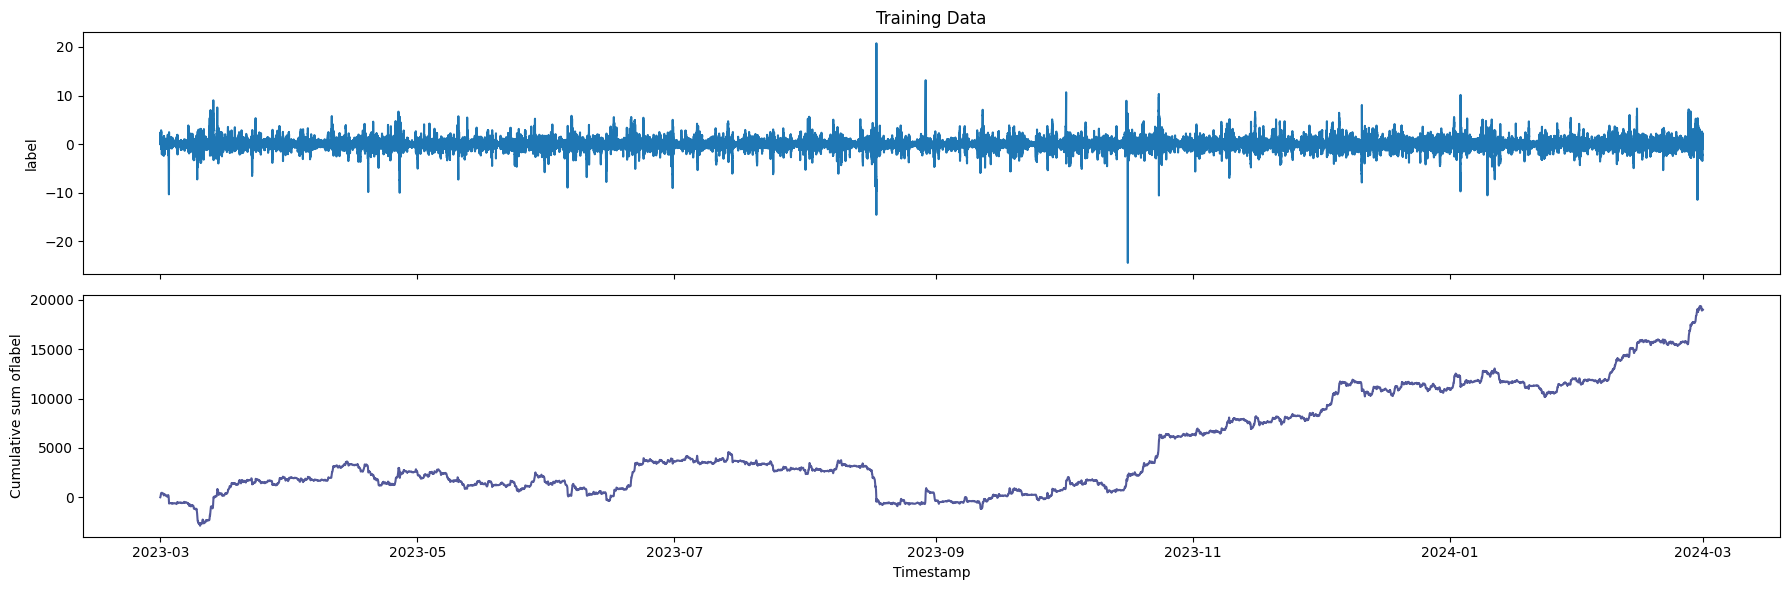

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
colors = ["#068D9D", "#53599A", "#607BB0", "#6D9DC5", "#77BECF", "#80DED9", "#AEECEF"]
target = 'label'

fig, ax = plt.subplots(2,1,figsize=(18,6),sharex=True)

print(ax)
print(ax[0])
ax[0].plot(df_train["timestamp"], df_train[target])
ax[0].set_ylabel(target)
ax[0].set_title("Training Data")

ax[1].plot(df_train["timestamp"], np.cumsum(df_train[target]), color=colors[1])
ax[1].set_ylabel("Cumulative sum of" + target)
ax[1].set_xlabel("Timestamp")

plt.tight_layout()

In [7]:
proprietary_features = [col for col in df_train.columns if col.startswith('X')]
basic_features = ['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume']
all_features = basic_features + proprietary_features

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

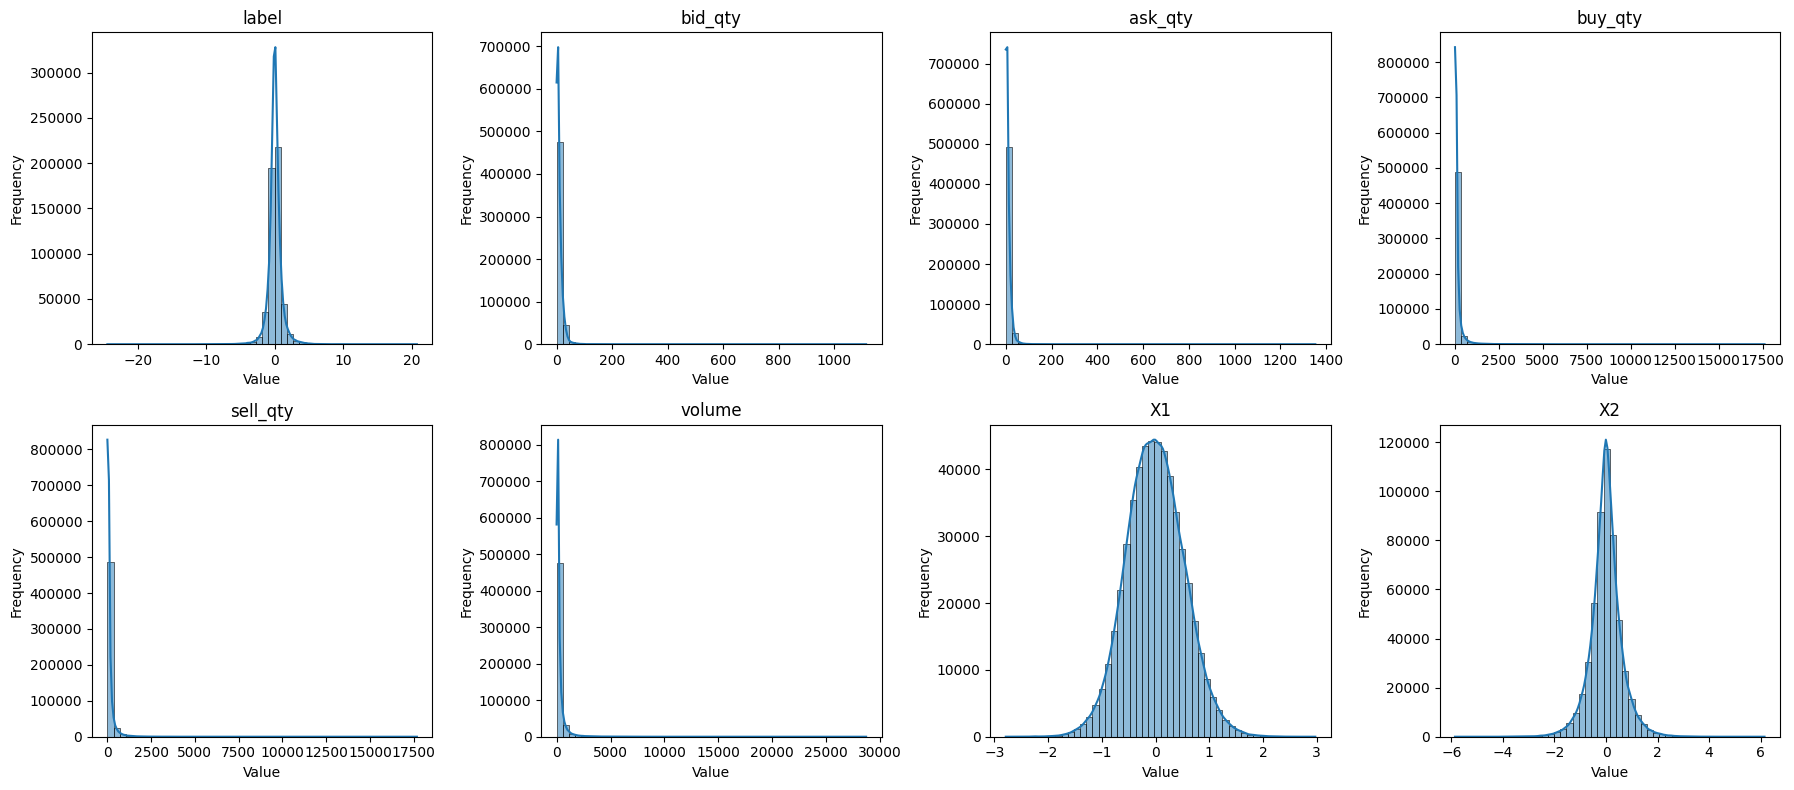

In [8]:
fig1, axes = plt.subplots(2, 4, figsize=(18, 8))
X_features = df_train[all_features]

for i, feature in enumerate(['label'] + all_features[:7]):
    row, col = i // 4, i % 4
    sns.histplot(df_train[feature], kde=True, bins=50, ax=axes[row, col])
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Data Analysis

In [9]:
df_train = pl.from_pandas(df_train)
print(type(df_train))

# Get count ofnull values per column
null_counts = df_train.select(proprietary_features).null_count() # df_train[proprietary_features].is_null().sum()
# Filter to show only columns with missing values
columns_with_nulls = null_counts.select([col for col in null_counts.columns if null_counts[col].item()>0])

if columns_with_nulls.is_empty():
    print("There are no columns with NA values.")
else :
    print(columns_with_nulls)

<class 'polars.dataframe.frame.DataFrame'>
There are no columns with NA values.


In [10]:
%%time
single_unique_value =[]
print(f"feature |unique value count")
for col in all_features:
    _cnt = df_train[col].n_unique() 
    if _cnt < 10:
        single_unique_value.append(col)
        print(f"{col}|{_cnt}")
        
print(f"There are {len(single_unique_value)} features with single unique value.")

feature |unique value count
X697|1
X698|1
X699|1
X700|1
X701|1
X702|1
X703|1
X704|1
X705|1
X706|1
X707|1
X708|1
X709|1
X710|1
X711|1
X712|1
X713|1
X714|1
X715|1
X716|1
X717|1
X864|1
X867|1
X869|1
X870|1
X871|1
X872|1
There are 27 features with single unique value.
CPU times: user 35.1 s, sys: 601 ms, total: 35.7 s
Wall time: 11 s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


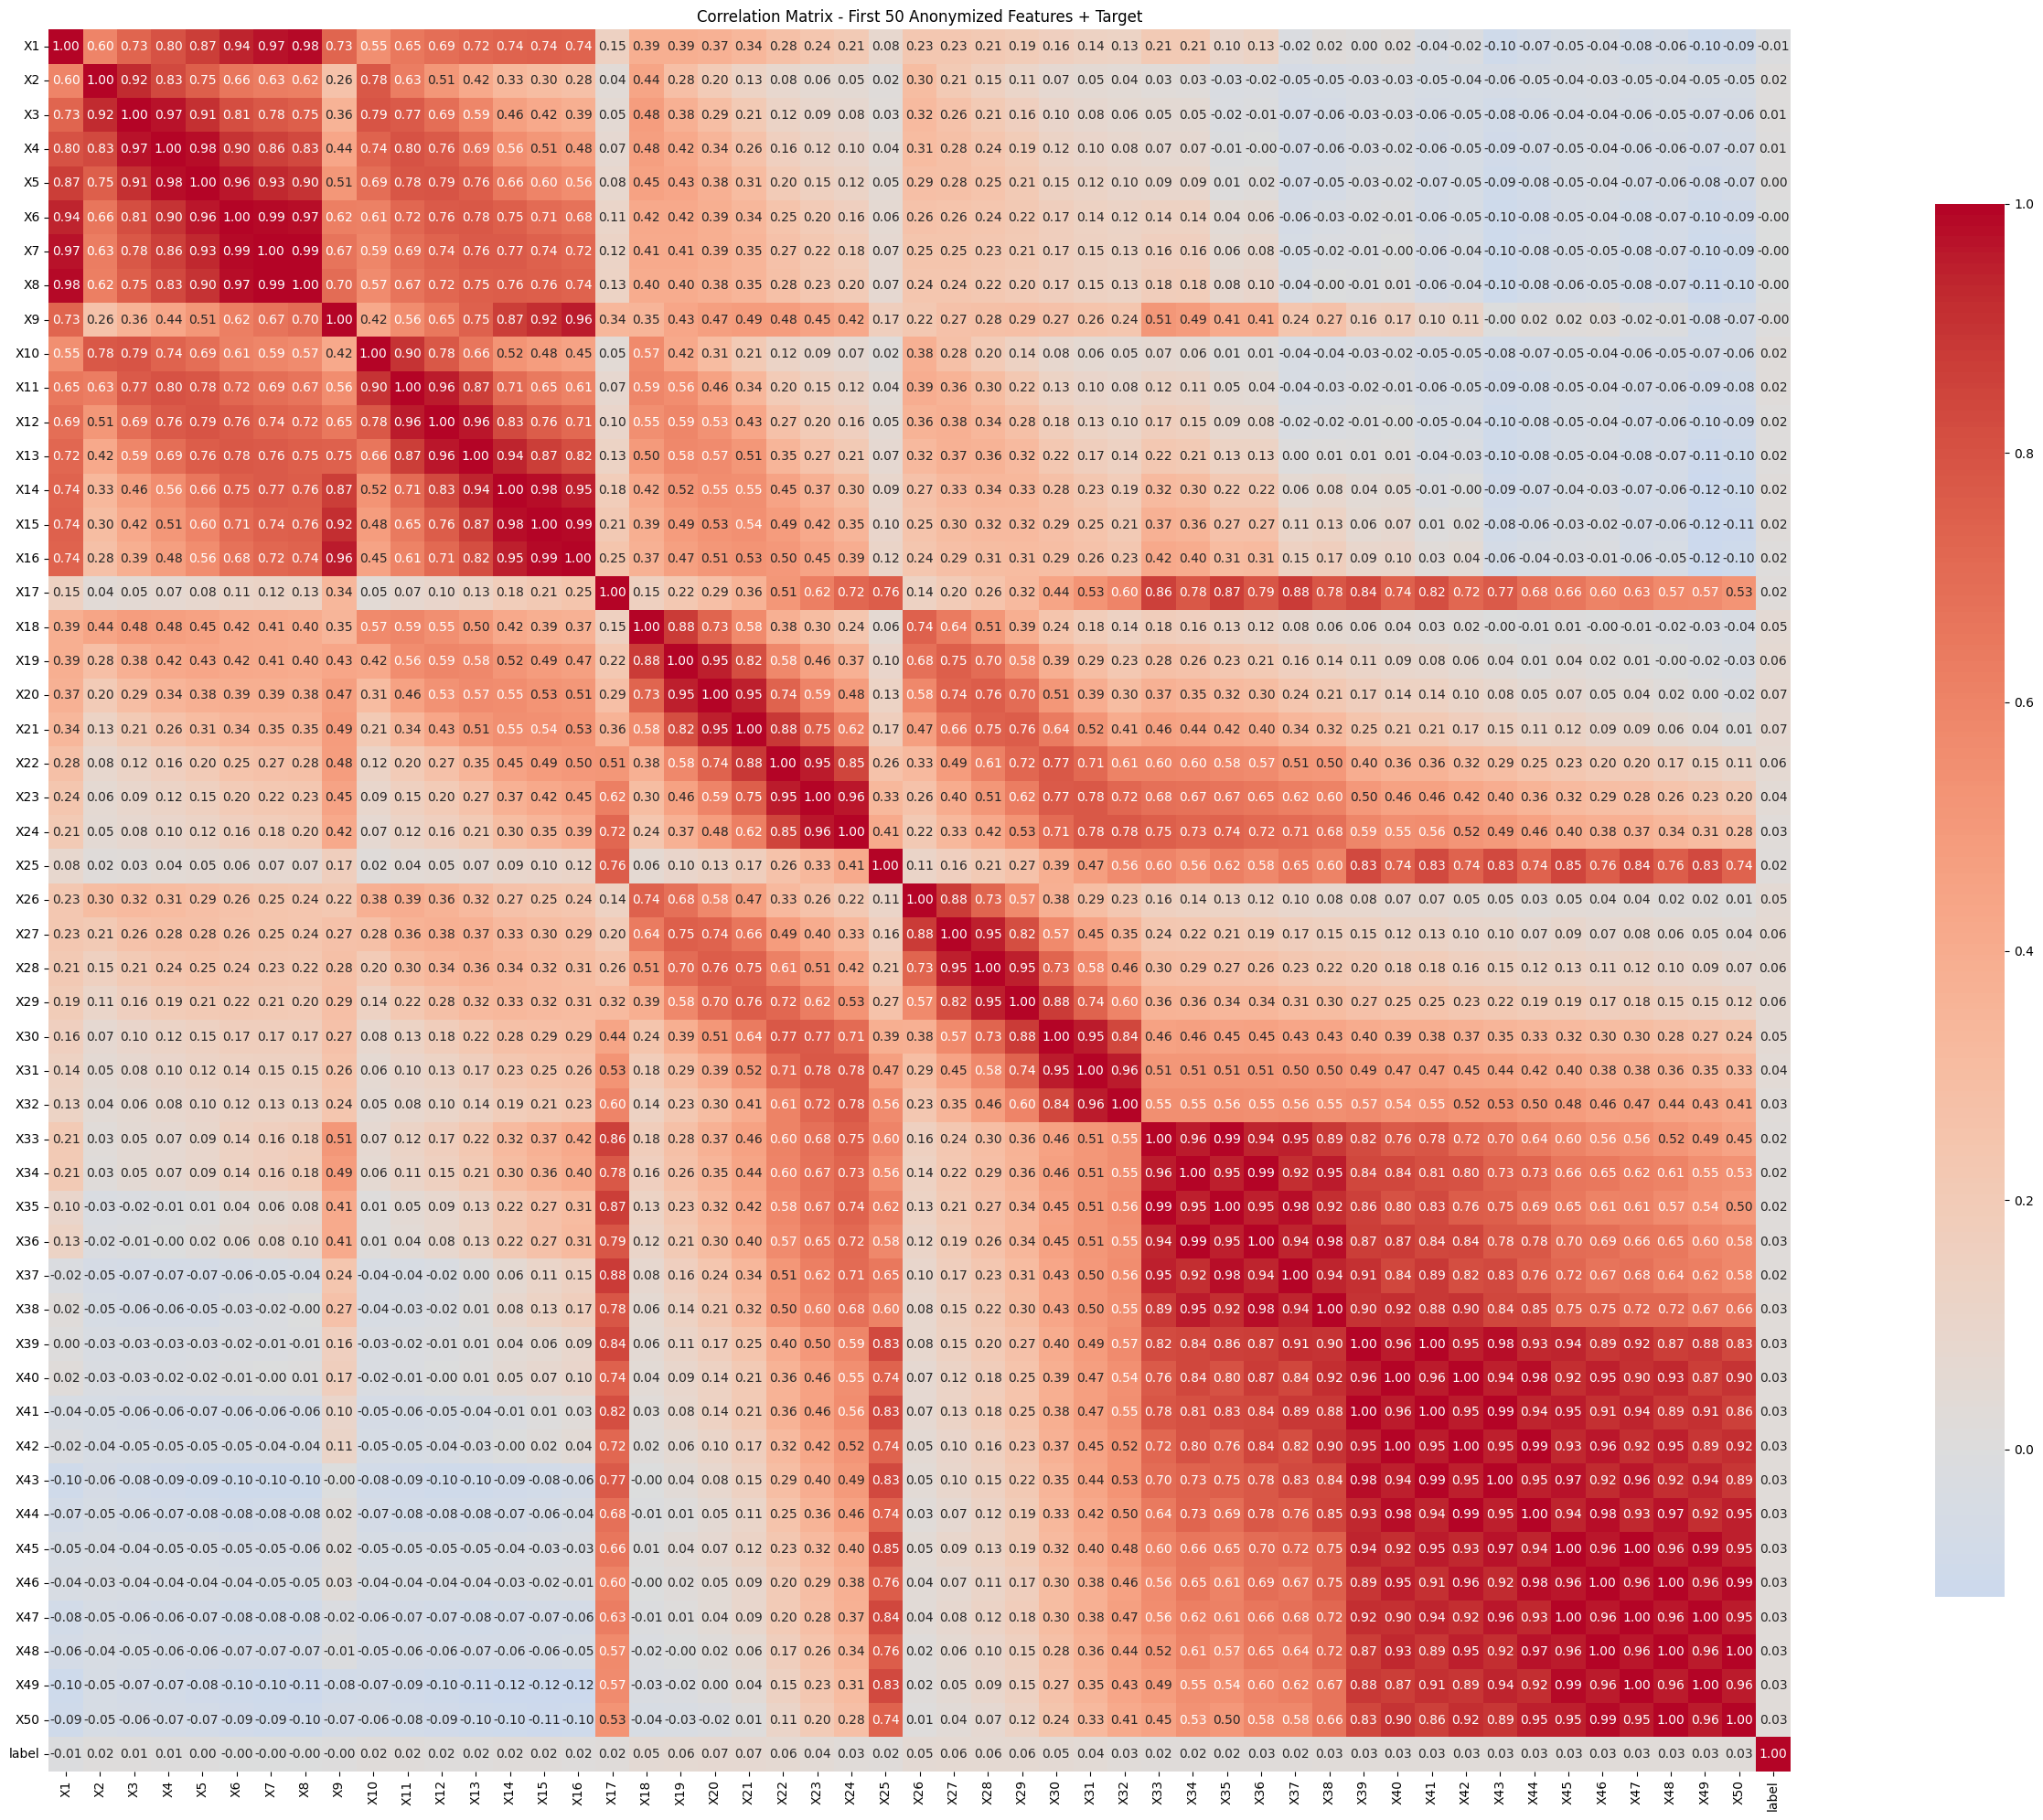

In [11]:
# Correlation analysis for a subset of features (first 50 for visualization)
subset_features = proprietary_features[:50]
correlation_matrix = df_train[subset_features  + [target]].corr()

# Plot correlation heatmap
plt.figure(figsize=(32, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            square=True, fmt='.2f',annot=True, cbar_kws={'shrink': 0.8},
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Matrix - First 50 Anonymized Features + Target')
plt.tight_layout()
plt.show()

In [12]:
def find_high_correlations(corr_matrix, threshold=0.8):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix[i, j]) > threshold:
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_matrix[i, j]
                })
    return pd.DataFrame(high_corr_pairs)

high_corr_df = find_high_correlations(correlation_matrix, threshold=0.98)
print(f"High correlation pairs (|corr| > 0.98):")
print(high_corr_df.sort_values('correlation', key=abs, ascending=False).head(50))

# Correlation with target variable
corr_all_matrix = df_train[proprietary_features  + [target]].corr()
target_correlations = corr_all_matrix[target].abs().sort_values(ascending=False)
print(f"\nTop 20 features most correlated with target:")
print(target_correlations.head(21)[1:])  # Exclude target itself

High correlation pairs (|corr| > 0.98):
   feature1 feature2  correlation
16      X46      X48     0.998509
14      X45      X47     0.998474
10      X40      X42     0.997352
8       X39      X41     0.997094
19      X48      X50     0.996034
18      X47      X49     0.996024
2        X7       X8     0.994787
6       X34      X36     0.993137
13      X42      X44     0.992733
12      X41      X43     0.992203
5       X33      X35     0.992038
1        X6       X7     0.990956
17      X46      X50     0.989819
15      X45      X49     0.989732
4       X15      X16     0.988683
0        X1       X8     0.982965
3       X14      X15     0.982270
11      X40      X44     0.981736
7       X36      X38     0.981475
9       X39      X43     0.980295


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: divide by zero encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


AttributeError: 'Series' object has no attribute 'sort_values'

# Data Preprocessing
---
1. 缺失值处理